In [1]:
import xarray as xr
import pandas as pd
import sklearn
import seaborn as sns
import numpy as np

In [2]:
d = pd.read_csv('radar_parameters.csv')
d = d.rename(columns = {'Unnamed: 0':'Row' })
ds = d.set_index('Row', inplace = True)
d

,Zh (dBZ),Zdr (dB),Ldr (dB),Kdp (deg km-1),Ah (dBZ/km),Adr (dB/km),R (mm/hr)
Row,,,,,,,
0,23.144878,0.418637,-41.757733,0.005395,0.000290,0.000012,2.393520
1,22.737156,0.322850,-43.772069,0.005194,0.000360,0.000012,3.502699
2,26.869826,0.330948,-43.577399,0.013385,0.000903,0.000030,8.627561
3,28.540561,0.399480,-42.139731,0.018872,0.001036,0.000043,8.424447
4,30.500127,0.543758,-39.763087,0.027438,0.001157,0.000064,8.189291
...,...,...,...,...,...,...,...
18964,31.515997,0.579955,-39.244229,0.034048,0.001417,0.000080,10.648020
18965,29.993334,0.567935,-39.399188,0.024134,0.001032,0.000057,7.981875
18966,31.685913,0.655681,-38.375696,0.033971,0.001165,0.000081,6.822691


In [3]:
X = d.drop('R (mm/hr)', axis=1)
Y = d['R (mm/hr)']
Y

Row
0         2.393520
1         3.502699
2         8.627561
3         8.424447
4         8.189291
           ...    
18964    10.648020
18965     7.981875
18966     6.822691
18967     6.801169
18968     2.582440
Name: R (mm/hr), Length: 18969, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0,train_size = 0.7)

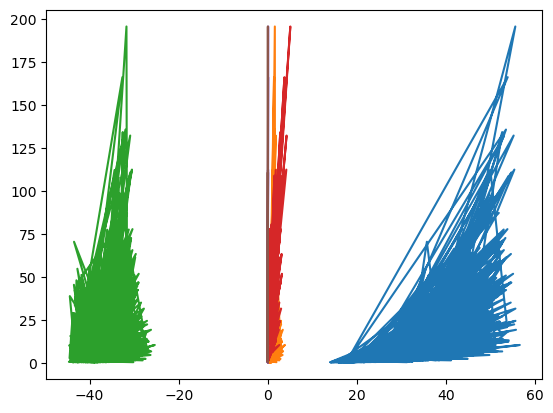

In [5]:
import matplotlib.pyplot as plt
plt.plot(x_train,y_train)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
Rsqrd = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 = {Rsqrd}" )

Mean Squared Error: 0.9171437197517373
Mean Absolute Error: 0.5520414657305026
R^2 = 0.986879174715016


In [8]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 1.54730156e-01  2.07180028e+00 -6.16452998e-01 -7.06270939e+01
  7.78165830e+03 -6.23505336e+03]
Intercept: -29.04312693861332


In [9]:
# Check with baseline: Z = 200R^(1.6)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(10),
              'linearregression__fit_intercept': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [11]:
grid.fit(X, Y);

In [12]:
grid.best_params_

{'linearregression__fit_intercept': True,
 'polynomialfeatures__degree': np.int64(5)}

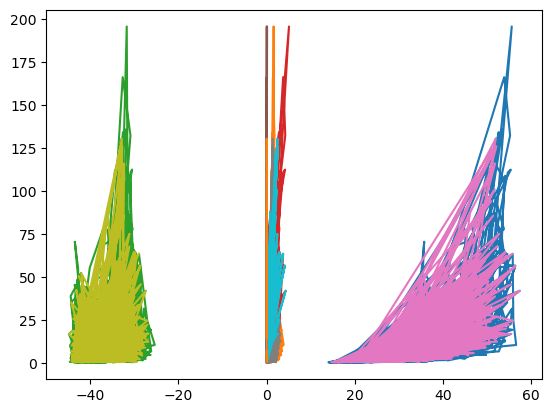

In [13]:
model = grid.best_estimator_

plt.plot(X, Y)
lim = plt.axis()
y_test = model.fit(X, Y).predict(x_test)
plt.plot(x_test, y_test);
plt.axis(lim);

In [27]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=50, random_state=0)

In [46]:
# create model
model_randForest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=1)

# fit model
model_randForest.fit(x_train, y_train)

# evaluate model
yhat = model_randForest.predict(x_test)
mse_forest = mean_squared_error(y_test, yhat)
print('Mean Squared Error: %.3f' % mse_forest)

Mean Squared Error: 3.209


In [ ]:
param_grid_forest = {
 "bootstrap": [True, False],
 "max_depth": [10, 100],
 "max_features": ["sqrt", 1.0],  
 "min_samples_leaf": [1, 4],
 "min_samples_split": [2, 10],
 "n_estimators": [200, 1000]}

#grid_forest = GridSearchCV(model_randForest, param_grid_forest, cv=7)

In [32]:
grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid=param_grid_forest, 
             cv=7, n_jobs=-1, verbose=2)

In [33]:
grid_search.fit(x_train, y_train)

Fitting 7 folds for each of 64 candidates, totalling 448 fits


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.6s
[CV] END bootstrap=True, max_depth=10, max_featu

/home/ek33/.conda/envs/logreg-weather/lib/python3.14/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  35.5s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  34.6s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  34.8s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   5.3s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   5.3s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   5.3s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   5.3s
[CV] END bootstrap=True, max_depth

,estimator,RandomForestRegressor()
,param_grid,"{'bootstrap': [True, False], 'max_depth': [10, 100], 'max_features': ['sqrt', 1.0], 'min_samples_leaf': [1, 4], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,7
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,1000


In [35]:
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'bootstrap': True, 'max_depth': 100, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


In [50]:
Rsqrd_forest = r2_score(y_test, yhat)
mae_forest = mean_absolute_error(y_test, yhat)

print("Random Forest:")
print(f"R^2 = {Rsqrd_forest}" )
print(f"Mean Absolute Error: {mae_forest}")
print('Mean Squared Error: %.3f' % mse_forest)

print('\n'
    "Multiple Regression")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 = {Rsqrd}" )

Random Forest:
R^2 = 0.9540843211814232
Mean Absolute Error: 0.45832593480320977
Mean Squared Error: 3.209

Multiple Regression
Mean Squared Error: 0.9171437197517373
Mean Absolute Error: 0.5520414657305026
R^2 = 0.986879174715016
